<a href="https://colab.research.google.com/github/rk1148/House-price-detection/blob/main/house_price_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd;
import numpy as np
import seaborn as sns     # represent our data on a plot.
import matplotlib.pyplot as plt     
                                          #enables the drawing of matplotlib figures in the IPython environment
%matplotlib inline        



In [ ]:
HouseDF = pd.read_csv('USA_HOUSING.txt')



In [ ]:
#print the head of the data sets(first 5 rows)
HouseDF.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\r\nLaurabury, NE 37..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\r\nLake Kathleen, ..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\r\nDanieltown, WI 064..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\r\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\r\nFPO AE 09386


In [ ]:
HouseDF.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              499 non-null    float64
 1   Avg. Area House Age           499 non-null    float64
 2   Avg. Area Number of Rooms     499 non-null    float64
 3   Avg. Area Number of Bedrooms  499 non-null    float64
 4   Area Population               499 non-null    float64
 5   Price                         499 non-null    float64
 6   Address                       499 non-null    object 
dtypes: float64(6), object(1)
memory usage: 27.4+ KB


In [ ]:
HouseDF.describe() #print count,min,max,mean,std,25%,50%

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,499.000000,499.000000,499.000000,499.000000,499.000000,4.990000e+02
mean,68133.068726,6.046416,6.971656,3.993006,35718.227289,1.226420e+06
std,10349.440485,0.994818,1.048369,1.231964,9901.830862,3.467320e+05
min,17796.631190,3.690891,3.236194,2.000000,172.610686,1.520719e+05
25%,61115.423069,5.358524,6.280309,3.155000,29407.022420,1.011090e+06
50%,68494.982552,6.027446,7.037477,4.070000,35799.638274,1.228811e+06
75%,75246.081250,6.771617,7.659928,4.490000,42215.773983,1.450157e+06
max,97112.361252,8.562611,9.710217,6.500000,69575.449464,2.469066e+06


In [ ]:
HouseDF.columns




Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

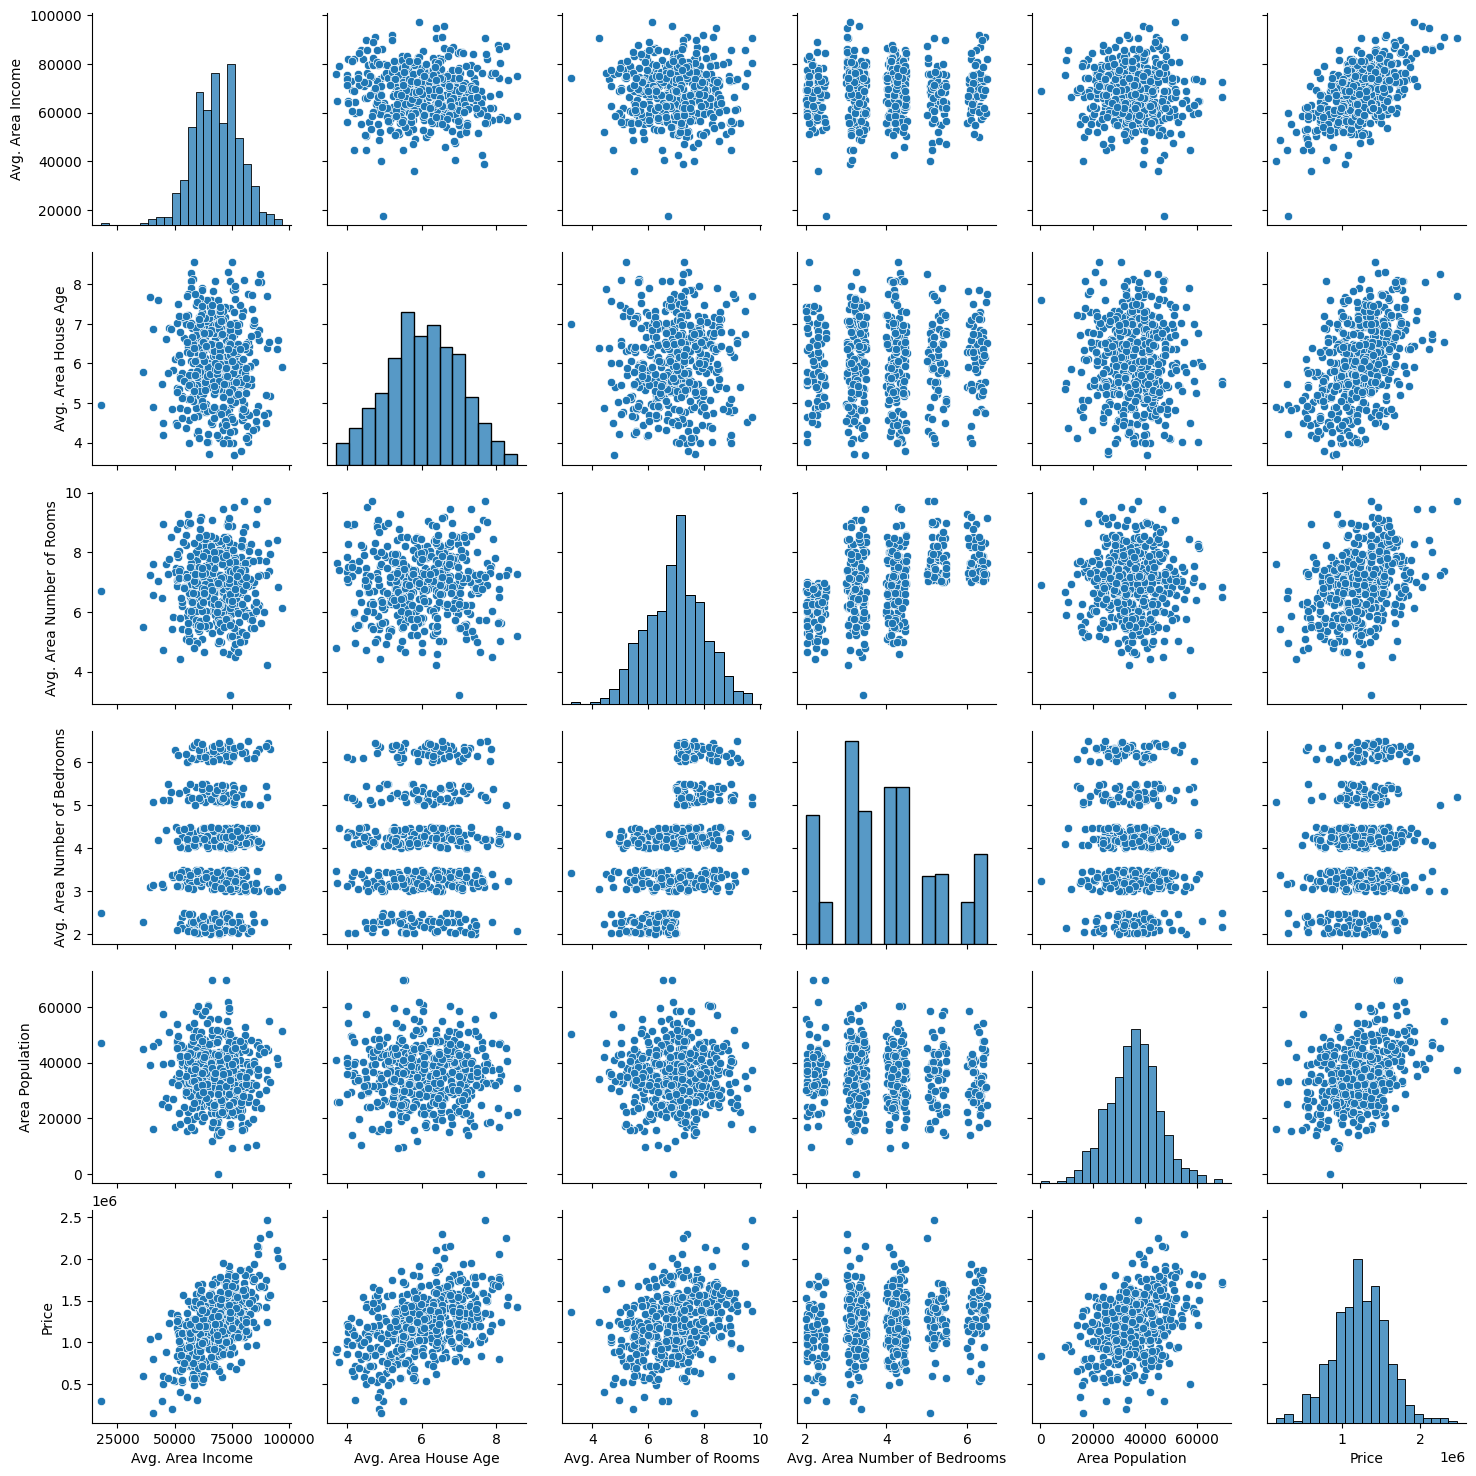

In [ ]:
sns.pairplot(HouseDF)    #it plots pairwise relation between 2 variables


A heatmap contains values representing various shades of the same colour for each value to be plotted. Usually the darker shades of the chart represent higher values than the lighter shade. For a very different value a completely different colour can also be used.

<ipython-input-10-26c9dc1b089f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(HouseDF.corr(), annot=True)   #corr() = finds the correlation of each column in a DataFrame.


<Axes: >

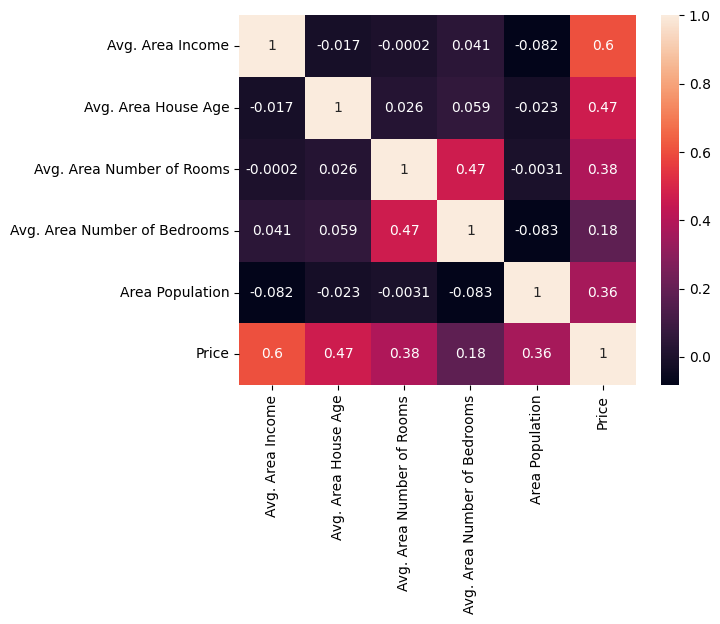

In [ ]:
sns.heatmap(HouseDF.corr(), annot=True)   #corr() = finds the correlation of each column in a DataFrame.
                                          #annot=true --> gives us the numbers in each cell
                                          # without annot it is only plotting diffent colurs


In [ ]:
X = HouseDF[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
#all are in-dependent features

Y = HouseDF['Price']

In [ ]:
#Create training and testing datasets
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.40, random_state=101)
                                                      
                                                      #40% data willl be use in test
                                                      #in every 101 data it will repeate

IMPORT LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

 #LOAD THE DATA IN fiunction
lm.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#coeff_df = coefficients tell us how much the output variable changes when each features increasing by one.
#coef_x = ".coef_" attribute of the trained model object returns an array of coefficients for each feature in the input data.

coeff_df = pd.DataFrame(lm.coef_,X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.381312
Avg. Area House Age,163656.850146
Avg. Area Number of Rooms,123315.953222
Avg. Area Number of Bedrooms,4074.995138
Area Population,14.596994


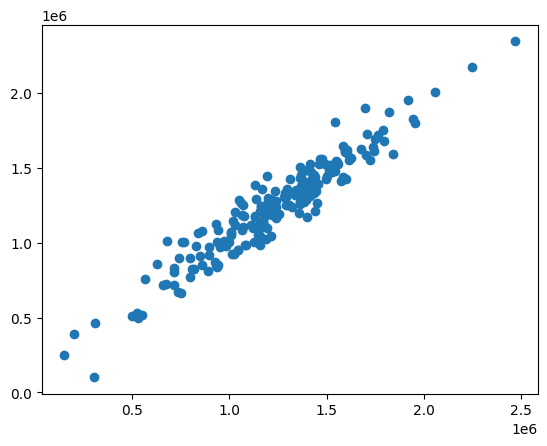

In [ ]:
predictions = lm.predict(X_test)
plt.scatter(Y_test,predictions)     #scatter plot to visualize the relationship between the predicted values and actual values

#if scatter is in line, its mean our model is well predicted



<ipython-input-26-9d3f1c5defb1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot((Y_test-predictions), bins=50);


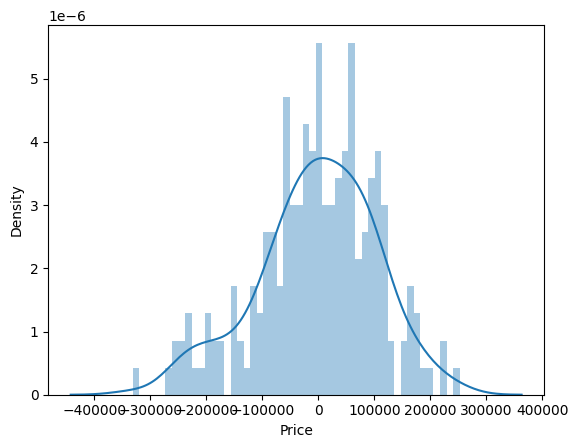

In [ ]:
sns.distplot((Y_test-predictions), bins=50);
#graph is in the bell from , that means our data predictions is good.
#Seaborn library to visualize the residuals (the differences between the predicted and actual values)

#this code will first calculate the difference between the actual and predicted values for each instance in the test dataset. The resulting array of residuals is then passed to the "distplot" function from the Seaborn library along with the argument "bins=50", which specifies the number of bins to use in the histogram.



Regression Evaluation Metrics

Mean Absolute Error (MAE) is the mean of the absolute value of the errors.

Mean Squared Error (MSE) is the mean of the squared errors.

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors.


In [27]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Y_test, predictions)) 
print('MSE:', metrics.mean_squared_error(Y_test, predictions)) 
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test, predictions))
) 


MAE: 82948.27673224622
MSE: 11295557755.284584
RMSE: 106280.56151189917
